### Final Project

30 points (1 pt for each task except for task 0)

Due by midnight June 24, 2022

Just follow along and complete the tasks outlined below. Most of the tasks can be solved in different ways. The tasks will get harder and harder as you go along.

**To avoid erasing the sample output, please insert a new cell above the sample output**. Write your script inside the new cell and run. Verify your output with the sample output

For project submission, please rename your file using the following format

`firstname_familyname_final.ipynb`

In [126]:
# please enter your name and 700# in this cell

## Sai Pranavi Kamani and 700733919#

### Part I: Google Playstore

### Task 0
Import numpy and pandas

In [127]:
import numpy as np
import pandas as pd

### Task 1
Read the Google Playstore csv file and create a pandas dataframe object. Review the first 5 rows

In [128]:
gp_df = pd.read_csv('googleplaystore.csv', encoding='utf-8')
gp_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Task 2
Identify the column(s) which contain missing values. Count the number of missing values for each column

In [129]:
gp_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

### Task 3
How many different categories of the apps the dataset contains

In [130]:
len(gp_df.groupby('Category').groups)

34

34

### Task 4
Draw a boxplot of the dataset

<AxesSubplot:>

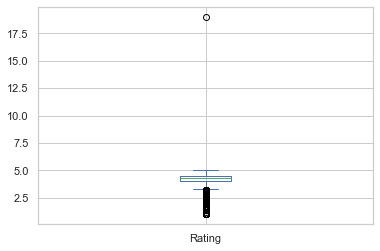

In [131]:
import seaborn as sns
sns.set()
sns.set_style(style='whitegrid')
%matplotlib inline
gp_df['Rating'].plot(kind = 'box' )

<AxesSubplot:>

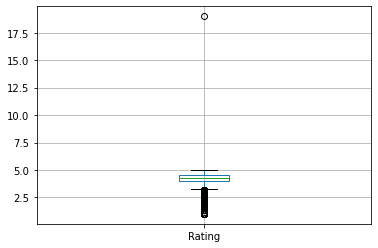

### Task 5
You have noticed an outlier for the rating values from the box plot above. Identify the row which contains that outlier

In [132]:
# From the box plot it is evident that outlier value of Rating  > 17.5
gp_df[gp_df['Rating'] > 17.5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


#### outlier with IQR method

In [133]:
Q1 = gp_df['Rating'].quantile(0.25)
Q3 = gp_df['Rating'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
filter_IQR =  (gp_df['Rating'] >= Q3 + 1.5 * IQR) 
gp_df.loc[filter_IQR] 


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


### Task 6
Please fill the missing values in the `Rating` column with the average rating from that column

In [134]:
fill = gp_df['Rating'].mean()

In [135]:
gp_df['Rating'].fillna(fill, inplace = True)

In [136]:
gp_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

### Task 7
Identify the exact data type for values in the `Last Updated` column

In [137]:
type(gp_df['Last Updated'][0])

str

str

### Task 8
Convert the values in the `Last Updated` column to Timestamp type. You will find an error. Identify the row which causes the error

In [138]:
for i, item in enumerate(gp_df['Last Updated']):
   try:
      pd.to_datetime(item)
   except ValueError:
      location = i
 
gp_df.loc[[location]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


### Task 9
Remove the row you identified from the previous task

In [139]:
# location has index of row identified in previous task
gp_df.drop([location],inplace = True)

### Task 10
Convert the values in the Last Updated column to Timestamp type and display the `Last Updated` column

In [140]:
gp_df['Last Updated'] = pd.to_datetime(gp_df['Last Updated'])
gp_df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

### Task 11
Convert the `Last Updated` column into the row index of the dataframe

In [141]:
gp_df.set_index('Last Updated', inplace=True)
gp_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
Last Updated,,,,,,,,,,,,
2018-01-07,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up
2018-01-15,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up
2018-08-01,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1.2.4,4.0.3 and up
2018-06-08,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,Varies with device,4.2 and up
2018-06-20,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,1.1,4.4 and up


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
Last Updated,,,,,,,,,,,,
2018-01-07,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,1.0.0,4.0.3 and up
2018-01-15,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up
2018-08-01,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1.2.4,4.0.3 and up
2018-06-08,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,Varies with device,4.2 and up
2018-06-20,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,1.1,4.4 and up


### Task 12
Sort the dataset index in ascenfing order and display the first five rows of the dataframe

In [142]:
gp_df.sort_index(inplace = True)
gp_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
Last Updated,,,,,,,,,,,,
2010-05-21,FML F*ck my life + widget,FAMILY,4.2,1415,209k,"100,000+",Free,0,Everyone,Entertainment,3.1,1.5 and up
2011-01-30,CJ Poker Odds Calculator,GAME,4.1,207,116k,"50,000+",Free,0,Everyone,Card,1.2,1.6 and up
2011-03-16,FD Shift Calendar Widget,TOOLS,4.1,981,73k,"100,000+",Free,0,Everyone,Tools,1.2.4,1.6 and up
2011-04-11,DEER HUNTER CHALLENGE,GAME,3.7,38767,4.1M,"5,000,000+",Free,0,Everyone 10+,Action,1.4.3,2.0 and up
2011-04-16,Freecell CY,GAME,4.0,387,1.1M,"50,000+",Free,0,Everyone,Card,1.3.3,1.6 and up


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
Last Updated,,,,,,,,,,,,
2010-05-21,FML F*ck my life + widget,FAMILY,4.2,1415,209k,"100,000+",Free,0,Everyone,Entertainment,3.1,1.5 and up
2011-01-30,CJ Poker Odds Calculator,GAME,4.1,207,116k,"50,000+",Free,0,Everyone,Card,1.2,1.6 and up
2011-03-16,FD Shift Calendar Widget,TOOLS,4.1,981,73k,"100,000+",Free,0,Everyone,Tools,1.2.4,1.6 and up
2011-04-11,DEER HUNTER CHALLENGE,GAME,3.7,38767,4.1M,"5,000,000+",Free,0,Everyone 10+,Action,1.4.3,2.0 and up
2011-04-16,Freecell CY,GAME,4.0,387,1.1M,"50,000+",Free,0,Everyone,Card,1.3.3,1.6 and up


### Task 13
What is the average rating for all apps created in year 2018

In [143]:
gp_df.loc['2018']['Rating'].mean()

4.238671591130771

4.238671591130771

### Task 14
What are the total different number of the categories for all apps

In [144]:
len(gp_df.groupby('Category').groups)

33

33

### Task 15
What are the top 5 categories of the apps?

In [145]:
gp_df.groupby('Category').count().sort_values(by = 'App', ascending= False)['App'].head(5)

Category
FAMILY      1972
GAME        1144
TOOLS        843
MEDICAL      463
BUSINESS     460
Name: App, dtype: int64

FAMILY      1972
GAME        1144
TOOLS        843
MEDICAL      463
BUSINESS     460
Name: Category, dtype: int64

### Task 16
Identify the exact data type for values in the `Reviews` column

In [146]:
type(gp_df['Reviews'][0])

str

str

### Task 17
Convert the values in the `Reviews` into integer and display your result for verification

In [147]:
gp_df['Reviews'] = gp_df['Reviews'].astype(np.dtype('int64'))
type(gp_df['Reviews'].dtype)

numpy.dtype[int64]

numpy.dtype[int64]

### Task 18
Display the list of all possible price values from the `Price` column. Identify the exact datatype of the values in the `Price` column. Convert the values in that coulumn to float (hint, you need to first remove the $ sign)

In [148]:
gp_df['Price'].unique()

array(['0', '$4.99', '$1.49', '$1.00', '$1.26', '$1.04', '$2.99', '$1.99',
       '$3.88', '$0.99', '$2.00', '$2.56', '$3.99', '$2.49', '$4.85',
       '$1.29', '$9.99', '$14.99', '$5.00', '$6.99', '$29.99', '$4.84',
       '$6.49', '$2.60', '$19.99', '$1.96', '$11.99', '$5.49', '$5.99',
       '$1.50', '$4.49', '$16.99', '$1.97', '$4.80', '$15.46', '$3.49',
       '$200.00', '$1.70', '$39.99', '$1.75', '$17.99', '$1.61', '$4.29',
       '$3.08', '$3.04', '$4.59', '$3.61', '$8.49', '$4.60', '$10.00',
       '$8.99', '$46.99', '$10.99', '$19.90', '$7.99', '$12.99', '$89.99',
       '$13.99', '$399.99', '$2.59', '$14.00', '$37.99', '$24.99',
       '$3.28', '$109.99', '$7.49', '$33.99', '$3.95', '$19.40',
       '$154.99', '$1.76', '$3.02', '$30.99', '$15.99', '$2.50', '$2.95',
       '$18.99', '$400.00', '$3.90', '$1.20', '$25.99', '$79.99',
       '$389.99', '$74.99', '$379.99', '$2.90', '$394.99', '$28.99',
       '$9.00', '$299.99', '$1.59', '$4.77'], dtype=object)

array(['0', '$4.99', '$1.49', '$1.00', '$1.26', '$1.04', '$2.99', '$1.99',
       '$3.88', '$0.99', '$2.00', '$2.56', '$3.99', '$2.49', '$4.85',
       '$1.29', '$9.99', '$14.99', '$5.00', '$6.99', '$29.99', '$4.84',
       '$6.49', '$2.60', '$19.99', '$1.96', '$11.99', '$5.49', '$5.99',
       '$1.50', '$4.49', '$16.99', '$1.97', '$4.80', '$15.46', '$3.49',
       '$200.00', '$1.70', '$39.99', '$1.75', '$17.99', '$1.61', '$4.29',
       '$3.08', '$3.04', '$4.59', '$3.61', '$8.49', '$4.60', '$10.00',
       '$8.99', '$46.99', '$10.99', '$19.90', '$7.99', '$12.99', '$89.99',
       '$13.99', '$399.99', '$2.59', '$14.00', '$37.99', '$24.99',
       '$3.28', '$109.99', '$7.49', '$33.99', '$3.95', '$19.40',
       '$154.99', '$1.76', '$3.02', '$30.99', '$15.99', '$2.50', '$2.95',
       '$18.99', '$400.00', '$3.90', '$1.20', '$25.99', '$79.99',
       '$389.99', '$74.99', '$379.99', '$2.90', '$394.99', '$28.99',
       '$9.00', '$299.99', '$1.59', '$4.77'], dtype=object)

### Task 19
Identify the exact data type for values in the `Price` column

In [149]:
type(gp_df['Price'][0])

str

str

### Task 20
Replace the `$` sign in front of the price. Convert the price into floating point numbers

In [150]:
gp_df['Price'] = gp_df['Price'].str.replace('[^.0-9]', '')

C:\Users\ilupo\AppData\Local\Temp/ipykernel_55052/1510385840.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  gp_df['Price'] = gp_df['Price'].str.replace('[^.0-9]', '')


In [151]:
gp_df['Price'].unique()

array(['0', '4.99', '1.49', '1.00', '1.26', '1.04', '2.99', '1.99',
       '3.88', '0.99', '2.00', '2.56', '3.99', '2.49', '4.85', '1.29',
       '9.99', '14.99', '5.00', '6.99', '29.99', '4.84', '6.49', '2.60',
       '19.99', '1.96', '11.99', '5.49', '5.99', '1.50', '4.49', '16.99',
       '1.97', '4.80', '15.46', '3.49', '200.00', '1.70', '39.99', '1.75',
       '17.99', '1.61', '4.29', '3.08', '3.04', '4.59', '3.61', '8.49',
       '4.60', '10.00', '8.99', '46.99', '10.99', '19.90', '7.99',
       '12.99', '89.99', '13.99', '399.99', '2.59', '14.00', '37.99',
       '24.99', '3.28', '109.99', '7.49', '33.99', '3.95', '19.40',
       '154.99', '1.76', '3.02', '30.99', '15.99', '2.50', '2.95',
       '18.99', '400.00', '3.90', '1.20', '25.99', '79.99', '389.99',
       '74.99', '379.99', '2.90', '394.99', '28.99', '9.00', '299.99',
       '1.59', '4.77'], dtype=object)

In [152]:
gp_df['Price'] = gp_df['Price'].astype(np.dtype(float))
gp_df['Price'].dtype

dtype('float64')

dtype('float64')

### Task 21
Find the apps with a price range between `$100` and `$200`

In [153]:
gp_df['Price'].unique()

array([  0.  ,   4.99,   1.49,   1.  ,   1.26,   1.04,   2.99,   1.99,
         3.88,   0.99,   2.  ,   2.56,   3.99,   2.49,   4.85,   1.29,
         9.99,  14.99,   5.  ,   6.99,  29.99,   4.84,   6.49,   2.6 ,
        19.99,   1.96,  11.99,   5.49,   5.99,   1.5 ,   4.49,  16.99,
         1.97,   4.8 ,  15.46,   3.49, 200.  ,   1.7 ,  39.99,   1.75,
        17.99,   1.61,   4.29,   3.08,   3.04,   4.59,   3.61,   8.49,
         4.6 ,  10.  ,   8.99,  46.99,  10.99,  19.9 ,   7.99,  12.99,
        89.99,  13.99, 399.99,   2.59,  14.  ,  37.99,  24.99,   3.28,
       109.99,   7.49,  33.99,   3.95,  19.4 , 154.99,   1.76,   3.02,
        30.99,  15.99,   2.5 ,   2.95,  18.99, 400.  ,   3.9 ,   1.2 ,
        25.99,  79.99, 389.99,  74.99, 379.99,   2.9 , 394.99,  28.99,
         9.  , 299.99,   1.59,   4.77])

In [154]:
gp_df[(gp_df['Price'] > 100) & (gp_df['Price'] < 200)]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
Last Updated,,,,,,,,,,,,
2017-08-23,BP Fitness Lead Scanner,EVENTS,4.193338,0,6.7M,1+,Paid,109.99,Everyone,Events,0.0.1,4.1 and up
2017-11-24,cronometra-br,PRODUCTIVITY,4.193338,0,5.4M,0+,Paid,154.99,Everyone,Productivity,1.0.0,4.1 and up


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
Last Updated,,,,,,,,,,,,
2017-08-23,BP Fitness Lead Scanner,EVENTS,4.193338,0,6.7M,1+,Paid,109.99,Everyone,Events,0.0.1,4.1 and up
2017-11-24,cronometra-br,PRODUCTIVITY,4.193338,0,5.4M,0+,Paid,154.99,Everyone,Productivity,1.0.0,4.1 and up


### Task 22
Identify the exact data type for values in the `Installs` column. After that, convert the values into integer. Hint, you need to remove the `+` and `,` signs from the number first before the convertion. Display the first five rows of the dataframe

In [155]:
type(gp_df['Installs'][0])

str

In [156]:
gp_df['Installs'].unique()

array(['100,000+', '50,000+', '5,000,000+', '100+', '1,000+', '5,000+',
       '1,000,000+', '10,000,000+', '10,000+', '50+', '10+', '500,000+',
       '500+', '5+', '50,000,000+', '1+', '0+', '100,000,000+',
       '500,000,000+', '0', '1,000,000,000+'], dtype=object)

In [157]:
gp_df['Installs'] = gp_df['Installs'].str.replace('[^.0-9]','').astype(int)


C:\Users\ilupo\AppData\Local\Temp/ipykernel_55052/3984023361.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  gp_df['Installs'] = gp_df['Installs'].str.replace('[^.0-9]','').astype(int)


In [158]:
gp_df['Installs'].unique()

array([    100000,      50000,    5000000,        100,       1000,
             5000,    1000000,   10000000,      10000,         50,
               10,     500000,        500,          5,   50000000,
                1,          0,  100000000,  500000000, 1000000000])

In [159]:
gp_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
Last Updated,,,,,,,,,,,,
2010-05-21,FML F*ck my life + widget,FAMILY,4.2,1415,209k,100000,Free,0.0,Everyone,Entertainment,3.1,1.5 and up
2011-01-30,CJ Poker Odds Calculator,GAME,4.1,207,116k,50000,Free,0.0,Everyone,Card,1.2,1.6 and up
2011-03-16,FD Shift Calendar Widget,TOOLS,4.1,981,73k,100000,Free,0.0,Everyone,Tools,1.2.4,1.6 and up
2011-04-11,DEER HUNTER CHALLENGE,GAME,3.7,38767,4.1M,5000000,Free,0.0,Everyone 10+,Action,1.4.3,2.0 and up
2011-04-16,Freecell CY,GAME,4.0,387,1.1M,50000,Free,0.0,Everyone,Card,1.3.3,1.6 and up


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver
Last Updated,,,,,,,,,,,,
2010-05-21,FML F*ck my life + widget,FAMILY,4.2,1415,209k,100000,Free,0.0,Everyone,Entertainment,3.1,1.5 and up
2011-01-30,CJ Poker Odds Calculator,GAME,4.1,207,116k,50000,Free,0.0,Everyone,Card,1.2,1.6 and up
2011-03-16,FD Shift Calendar Widget,TOOLS,4.1,981,73k,100000,Free,0.0,Everyone,Tools,1.2.4,1.6 and up
2011-04-11,DEER HUNTER CHALLENGE,GAME,3.7,38767,4.1M,5000000,Free,0.0,Everyone 10+,Action,1.4.3,2.0 and up
2011-04-16,Freecell CY,GAME,4.0,387,1.1M,50000,Free,0.0,Everyone,Card,1.3.3,1.6 and up


### Task 23
Fine the average `Rating`, `Reviews`, `Installs` and `Price` for each year

In [160]:
gp_df.resample('Y').mean()

,Rating,Reviews,Installs,Price
Last Updated,,,,
2010-12-31,4.200000,1415.000000,1.000000e+05,0.000000
2011-12-31,3.966667,15720.000000,1.160473e+06,0.498667
2012-12-31,3.864104,10398.538462,5.381619e+05,0.318077
2013-12-31,4.090849,32498.072727,9.381033e+05,0.921364
2014-12-31,4.052026,31469.602871,1.291657e+06,1.362919
2015-12-31,4.086769,29099.150327,9.249270e+05,1.330370
2016-12-31,4.070623,31282.805970,1.743154e+06,0.570746
2017-12-31,4.114270,60669.221746,2.180747e+06,1.976551
2018-12-31,4.238672,633035.863111,2.195282e+07,0.813033


,Rating,Reviews,Installs,Price
Last Updated,,,,
2010-12-31,4.200000,1415.000000,1.000000e+05,0.000000
2011-12-31,3.966667,15720.000000,1.160473e+06,0.498667
2012-12-31,3.864104,10398.538462,5.381619e+05,0.318077
2013-12-31,4.090849,32498.072727,9.381033e+05,0.921364
2014-12-31,4.052026,31469.602871,1.291657e+06,1.362919
2015-12-31,4.086769,29099.150327,9.249270e+05,1.330370
2016-12-31,4.070623,31282.805970,1.743154e+06,0.570746
2017-12-31,4.114270,60669.221746,2.180747e+06,1.976551
2018-12-31,4.238672,633035.863111,2.195282e+07,0.813033


### Task 24
Observe the values in the `Genres` column. You may notice that some values contain multiple genres which are separated by `;`. Create a new coulum named `Genre` and each value of the new column contains a list of genre names. Display the first five rows of the new dataframe

In [161]:
gp_df['Genre'] = gp_df['Genres'].str.split(';')

In [162]:
gp_df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Genre
Last Updated,,,,,,,,,,,,,
2010-05-21,FML F*ck my life + widget,FAMILY,4.2,1415,209k,100000,Free,0.0,Everyone,Entertainment,3.1,1.5 and up,[Entertainment]
2011-01-30,CJ Poker Odds Calculator,GAME,4.1,207,116k,50000,Free,0.0,Everyone,Card,1.2,1.6 and up,[Card]
2011-03-16,FD Shift Calendar Widget,TOOLS,4.1,981,73k,100000,Free,0.0,Everyone,Tools,1.2.4,1.6 and up,[Tools]
2011-04-11,DEER HUNTER CHALLENGE,GAME,3.7,38767,4.1M,5000000,Free,0.0,Everyone 10+,Action,1.4.3,2.0 and up,[Action]
2011-04-16,Freecell CY,GAME,4.0,387,1.1M,50000,Free,0.0,Everyone,Card,1.3.3,1.6 and up,[Card]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Genre
Last Updated,,,,,,,,,,,,,
2010-05-21,FML F*ck my life + widget,FAMILY,4.2,1415,209k,100000,Free,0.0,Everyone,Entertainment,3.1,1.5 and up,[Entertainment]
2011-01-30,CJ Poker Odds Calculator,GAME,4.1,207,116k,50000,Free,0.0,Everyone,Card,1.2,1.6 and up,[Card]
2011-03-16,FD Shift Calendar Widget,TOOLS,4.1,981,73k,100000,Free,0.0,Everyone,Tools,1.2.4,1.6 and up,[Tools]
2011-04-11,DEER HUNTER CHALLENGE,GAME,3.7,38767,4.1M,5000000,Free,0.0,Everyone 10+,Action,1.4.3,2.0 and up,[Action]
2011-04-16,Freecell CY,GAME,4.0,387,1.1M,50000,Free,0.0,Everyone,Card,1.3.3,1.6 and up,[Card]


### Task 25
If an element in the `genre` column has multiple values in the list, separate each genre name into different rows. Display the last five rows of the new dataframe. Hint, research the pandas `explode` function

In [163]:
gp_df = gp_df.explode('Genre')

In [164]:
gp_df.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Genre
Last Updated,,,,,,,,,,,,,
2018-08-08,BankNordik,FINANCE,3.9,28,15M,5000,Free,0.00,Everyone,Finance,7.3.2,5.0 and up,Finance
2018-08-08,Lalafo Pulsuz Elanlar,SHOPPING,4.4,61392,Varies with device,1000000,Free,0.00,Everyone,Shopping,Varies with device,Varies with device,Shopping
2018-08-08,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,1000,Paid,7.99,Everyone,Health & Fitness,1.9.3,4.2 and up,Health & Fitness
2018-08-08,Video Downloader For FB: Save FB Videos 2018,TOOLS,4.3,434,3.6M,50000,Free,0.00,Everyone,Tools,1.1.9,4.0.3 and up,Tools
2018-08-08,Shoot Hunter-Gun Killer,GAME,4.3,320334,27M,50000000,Free,0.00,Teen,Action,1.1.2,4.1 and up,Action


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Genre
Last Updated,,,,,,,,,,,,,
2018-08-08,BankNordik,FINANCE,3.9,28,15M,5000,Free,0.00,Everyone,Finance,7.3.2,5.0 and up,Finance
2018-08-08,Lalafo Pulsuz Elanlar,SHOPPING,4.4,61392,Varies with device,1000000,Free,0.00,Everyone,Shopping,Varies with device,Varies with device,Shopping
2018-08-08,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2.4M,1000,Paid,7.99,Everyone,Health & Fitness,1.9.3,4.2 and up,Health & Fitness
2018-08-08,Video Downloader For FB: Save FB Videos 2018,TOOLS,4.3,434,3.6M,50000,Free,0.00,Everyone,Tools,1.1.9,4.0.3 and up,Tools
2018-08-08,Shoot Hunter-Gun Killer,GAME,4.3,320334,27M,50000000,Free,0.00,Teen,Action,1.1.2,4.1 and up,Action


### Task 26
Draw a bar plot to display the number of apps for each genre. Which genre has the most apps?

<AxesSubplot:>

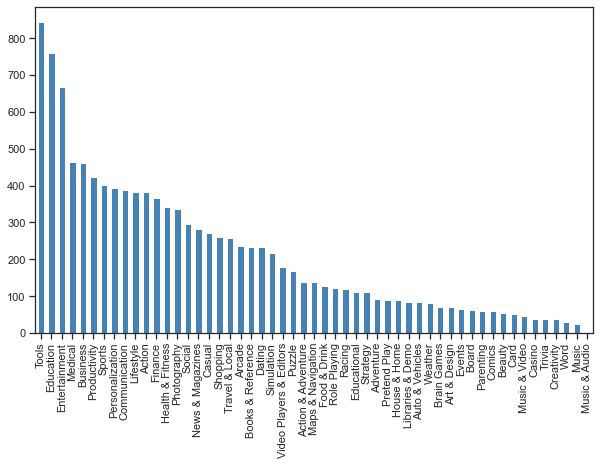

In [165]:
sns.set_style(style='ticks')
gp_df.groupby('Genre')['App'].count().sort_values(ascending = False).plot(kind = 'bar',figsize = (10, 6),xlabel = '', width = 0.6, color = 'steelblue')

<AxesSubplot:>

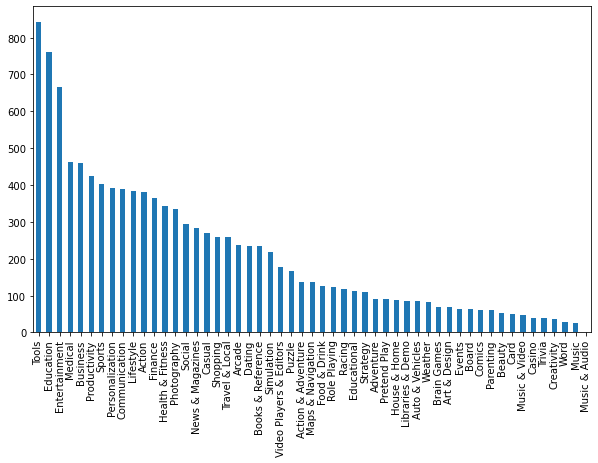

### Part II: Wine Prediction Using KNN
In this part of the final project, you will use the Wine dataset provided by sklearn to perform the wine classification

### Task 26
Load the wine dataset from sklearn (use `load_wine` from the `sklearn.datasets` module) and conduct the necessary processing on the training dataset

In [166]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [167]:
wine.data.shape

(178, 13)

In [168]:
wine.target.shape

(178,)

#### As all are numeric features applying StandardScaler to normalize values in different scales, this preprocessing is needed for better results.

In [169]:
from sklearn.preprocessing import StandardScaler
#Applying scaling
ss = StandardScaler()
scaled_featur = ss.fit_transform(wine.data)
scaled_featur

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

### Task 27
Split the dataset into training and test sets with a test size of 25%. Use `random_state=66` for reproducibility. Set `K=1` for KNN and generate the classification report

In [170]:
from sklearn.model_selection import train_test_split
# test_size represent the proportion of the dataset to include in the test split
Xtrain, Xtest, ytrain, ytest = train_test_split(scaled_featur, wine.target, test_size = 0.25, random_state = 66)


In [171]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn_classifier = KNeighborsClassifier(n_neighbors=1)

# fit the k-nearest neighbors classifier from the training dataset
knn_classifier.fit(Xtrain,ytrain)

# predict the class labels for the provided data
pred = knn_classifier.predict(Xtest)

print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.94      0.97        17
           2       0.91      1.00      0.95        10

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.94      0.97        17
           2       0.91      1.00      0.95        10

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



### Task 28
Using the Exhaustive Grid Search to find the best `K` in the `range(1, 20, 2)`. Using `10-fold`

In [172]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param = {'n_neighbors': range(1, 20, 2)}
gc = GridSearchCV(knn, param_grid=param, cv=10)
gc.fit(Xtrain, ytrain)
# the score on the test dataset
gc.score(Xtest, ytest)
gc

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20, 2)})

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20, 2)})

### Task 29
What is the best score from Task 28

In [173]:
gc.best_score_

0.9780219780219781

0.9780219780219781

### Task 30
What is the best estimator from Task 28

In [174]:
gc.best_estimator_

KNeighborsClassifier(n_neighbors=17)

KNeighborsClassifier(n_neighbors=17)